<a href="https://colab.research.google.com/github/Nihal-18/Computer-Vision/blob/main/Assignment_1_J058/Exp_10_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: NIHAL M TODANKAR

ROLL NO: J058

BATCH: J3

#Exp 10: 
Perform image segmentation in an image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# reading image using cv2.imread()
img0= cv2.imread('/content/drive/MyDrive/istock-598825938.png')

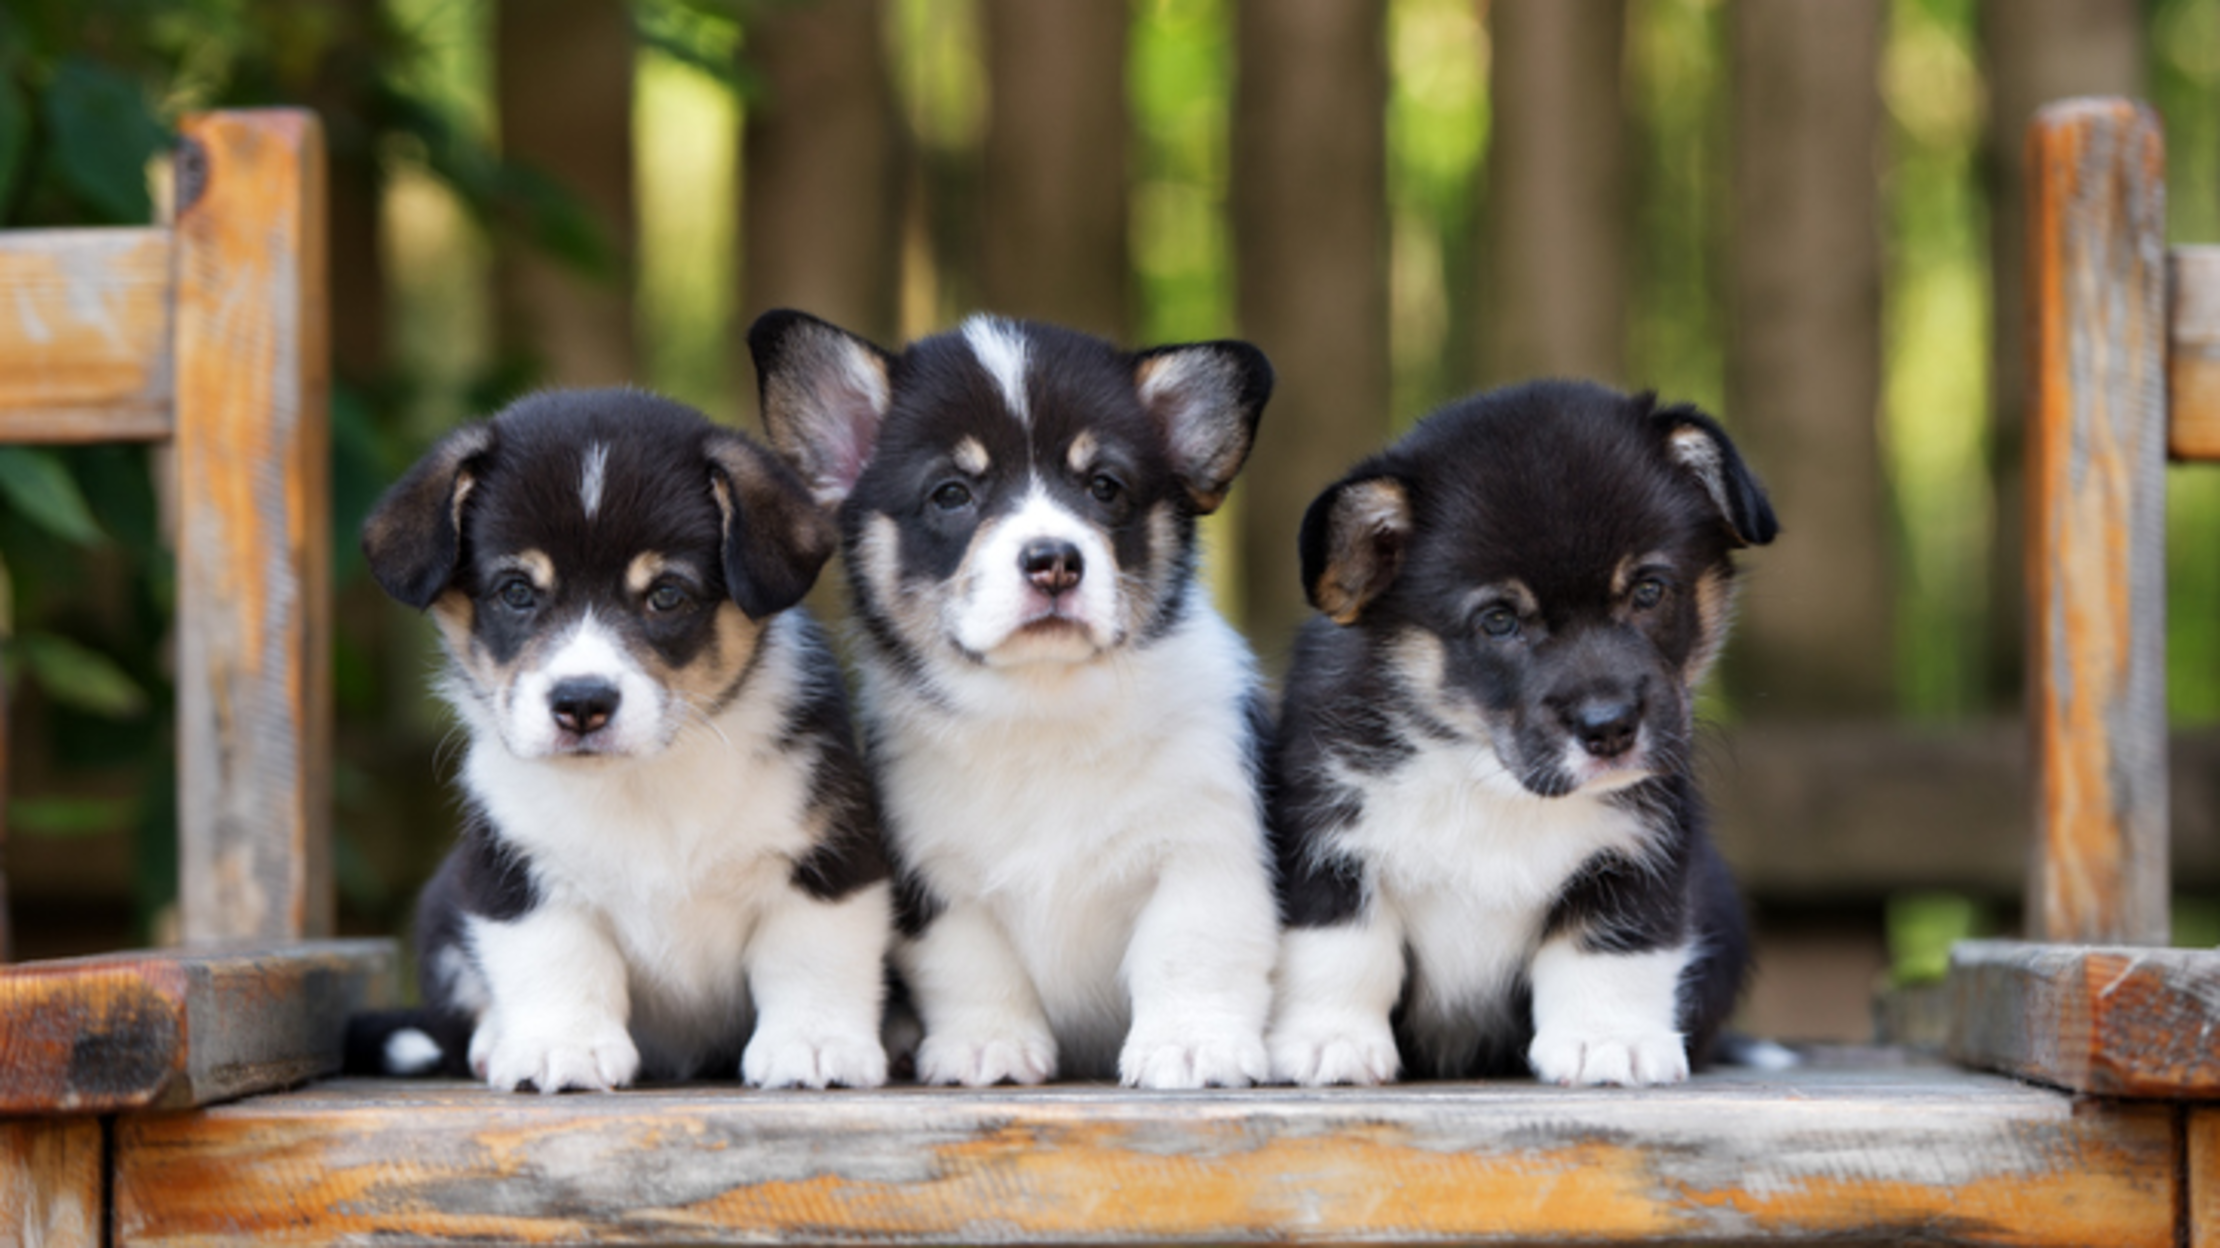

In [ ]:
cv2_imshow(img0)

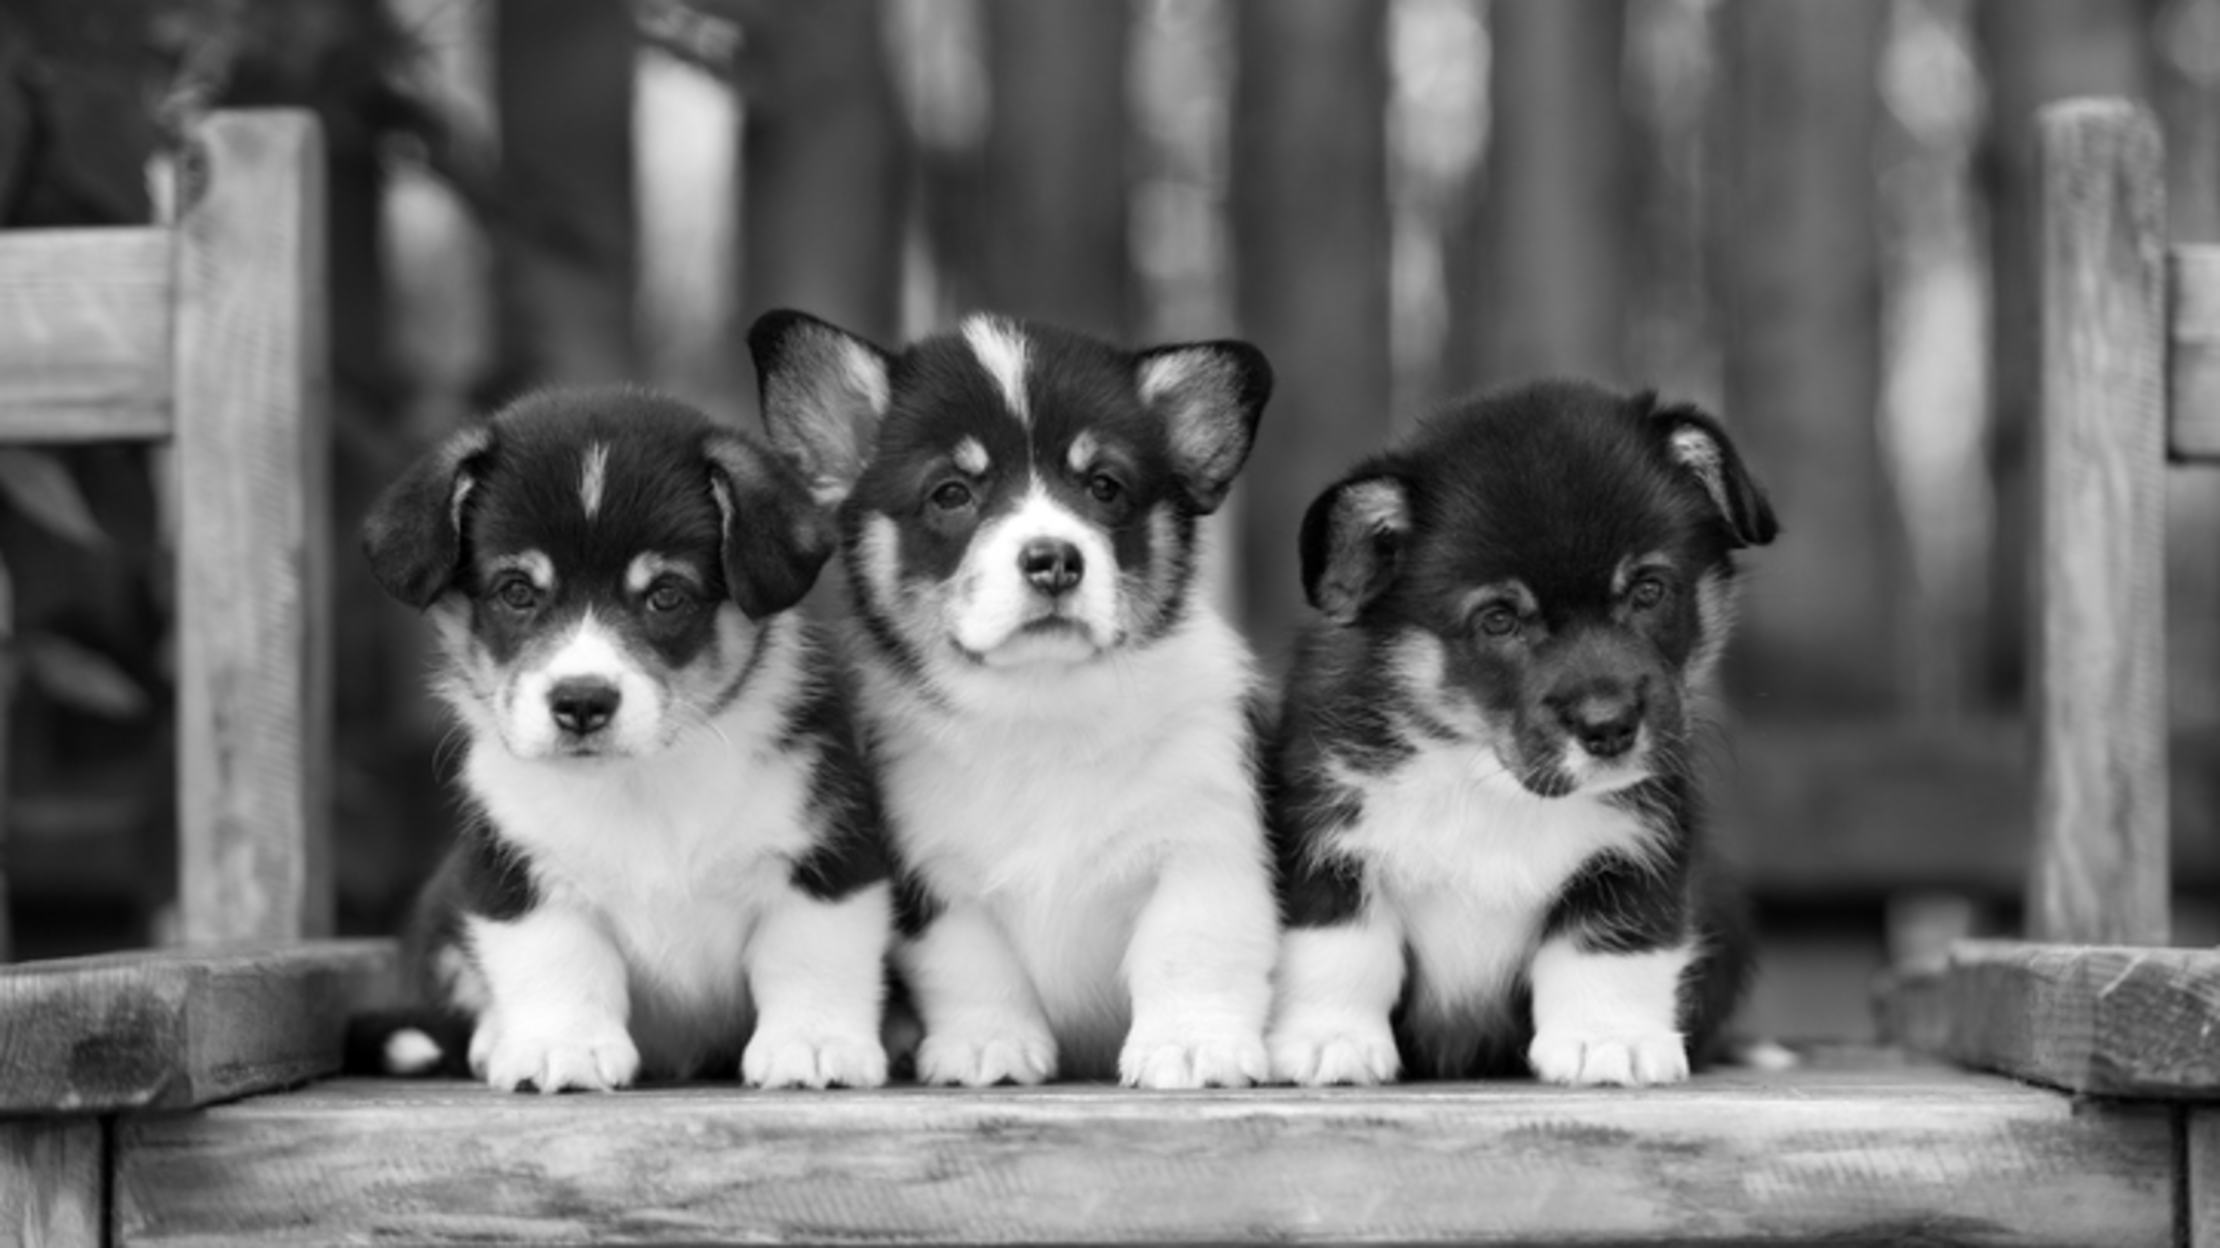

In [ ]:
# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray)

In [ ]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

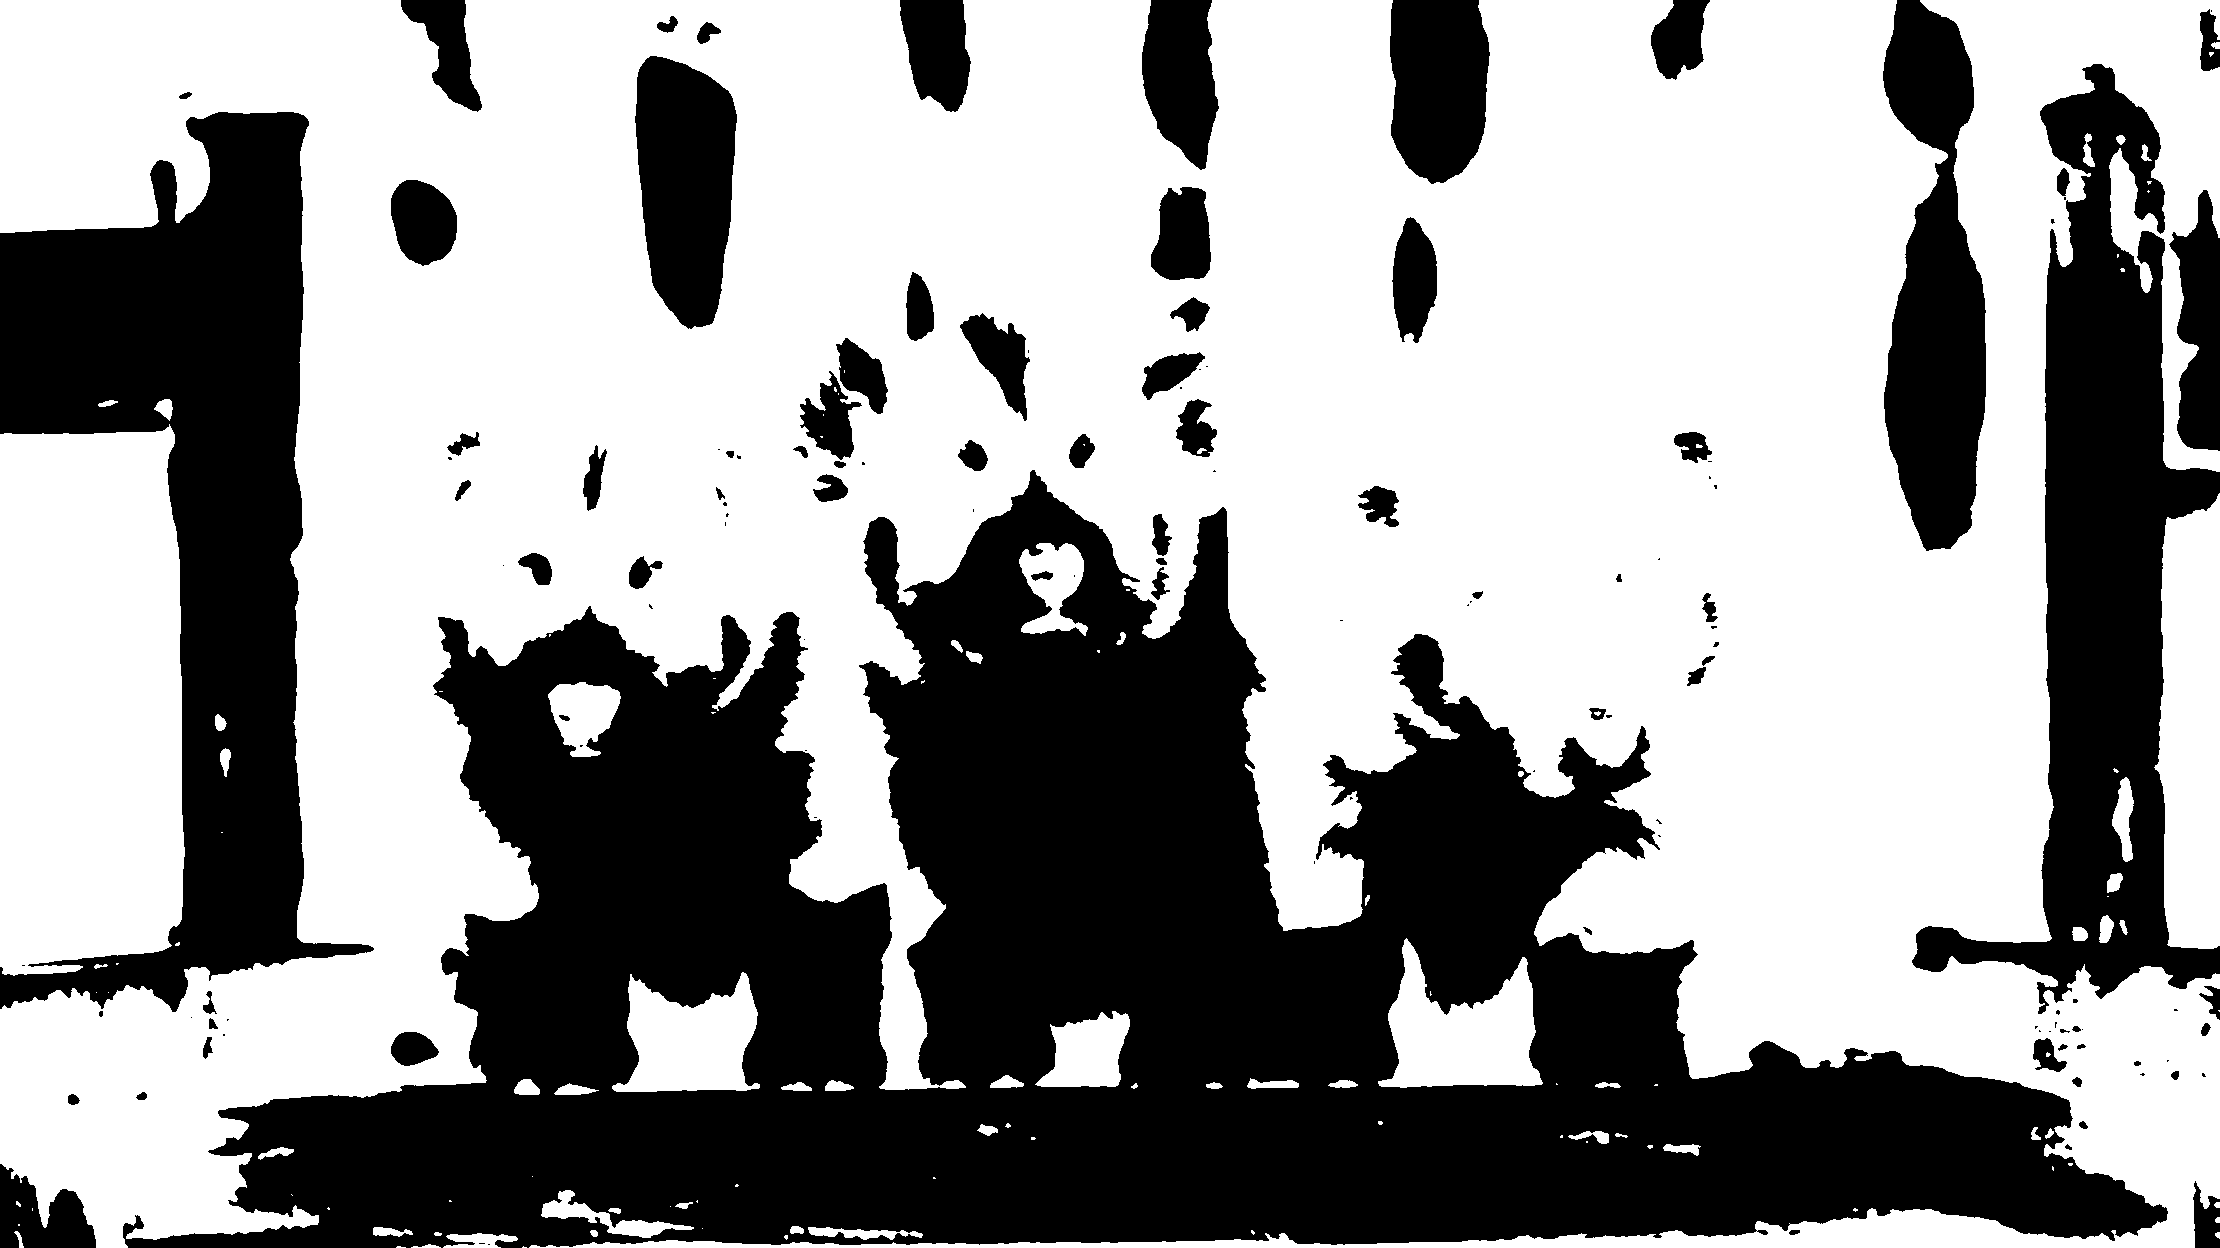

In [ ]:
cv2_imshow(thresh)

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

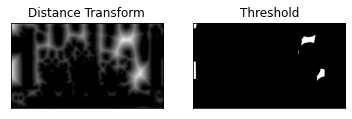

In [ ]:
plt.subplot(121),plt.imshow(dist_transform,cmap = 'gray')
plt.title('Distance Transform'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_fg,cmap = 'gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

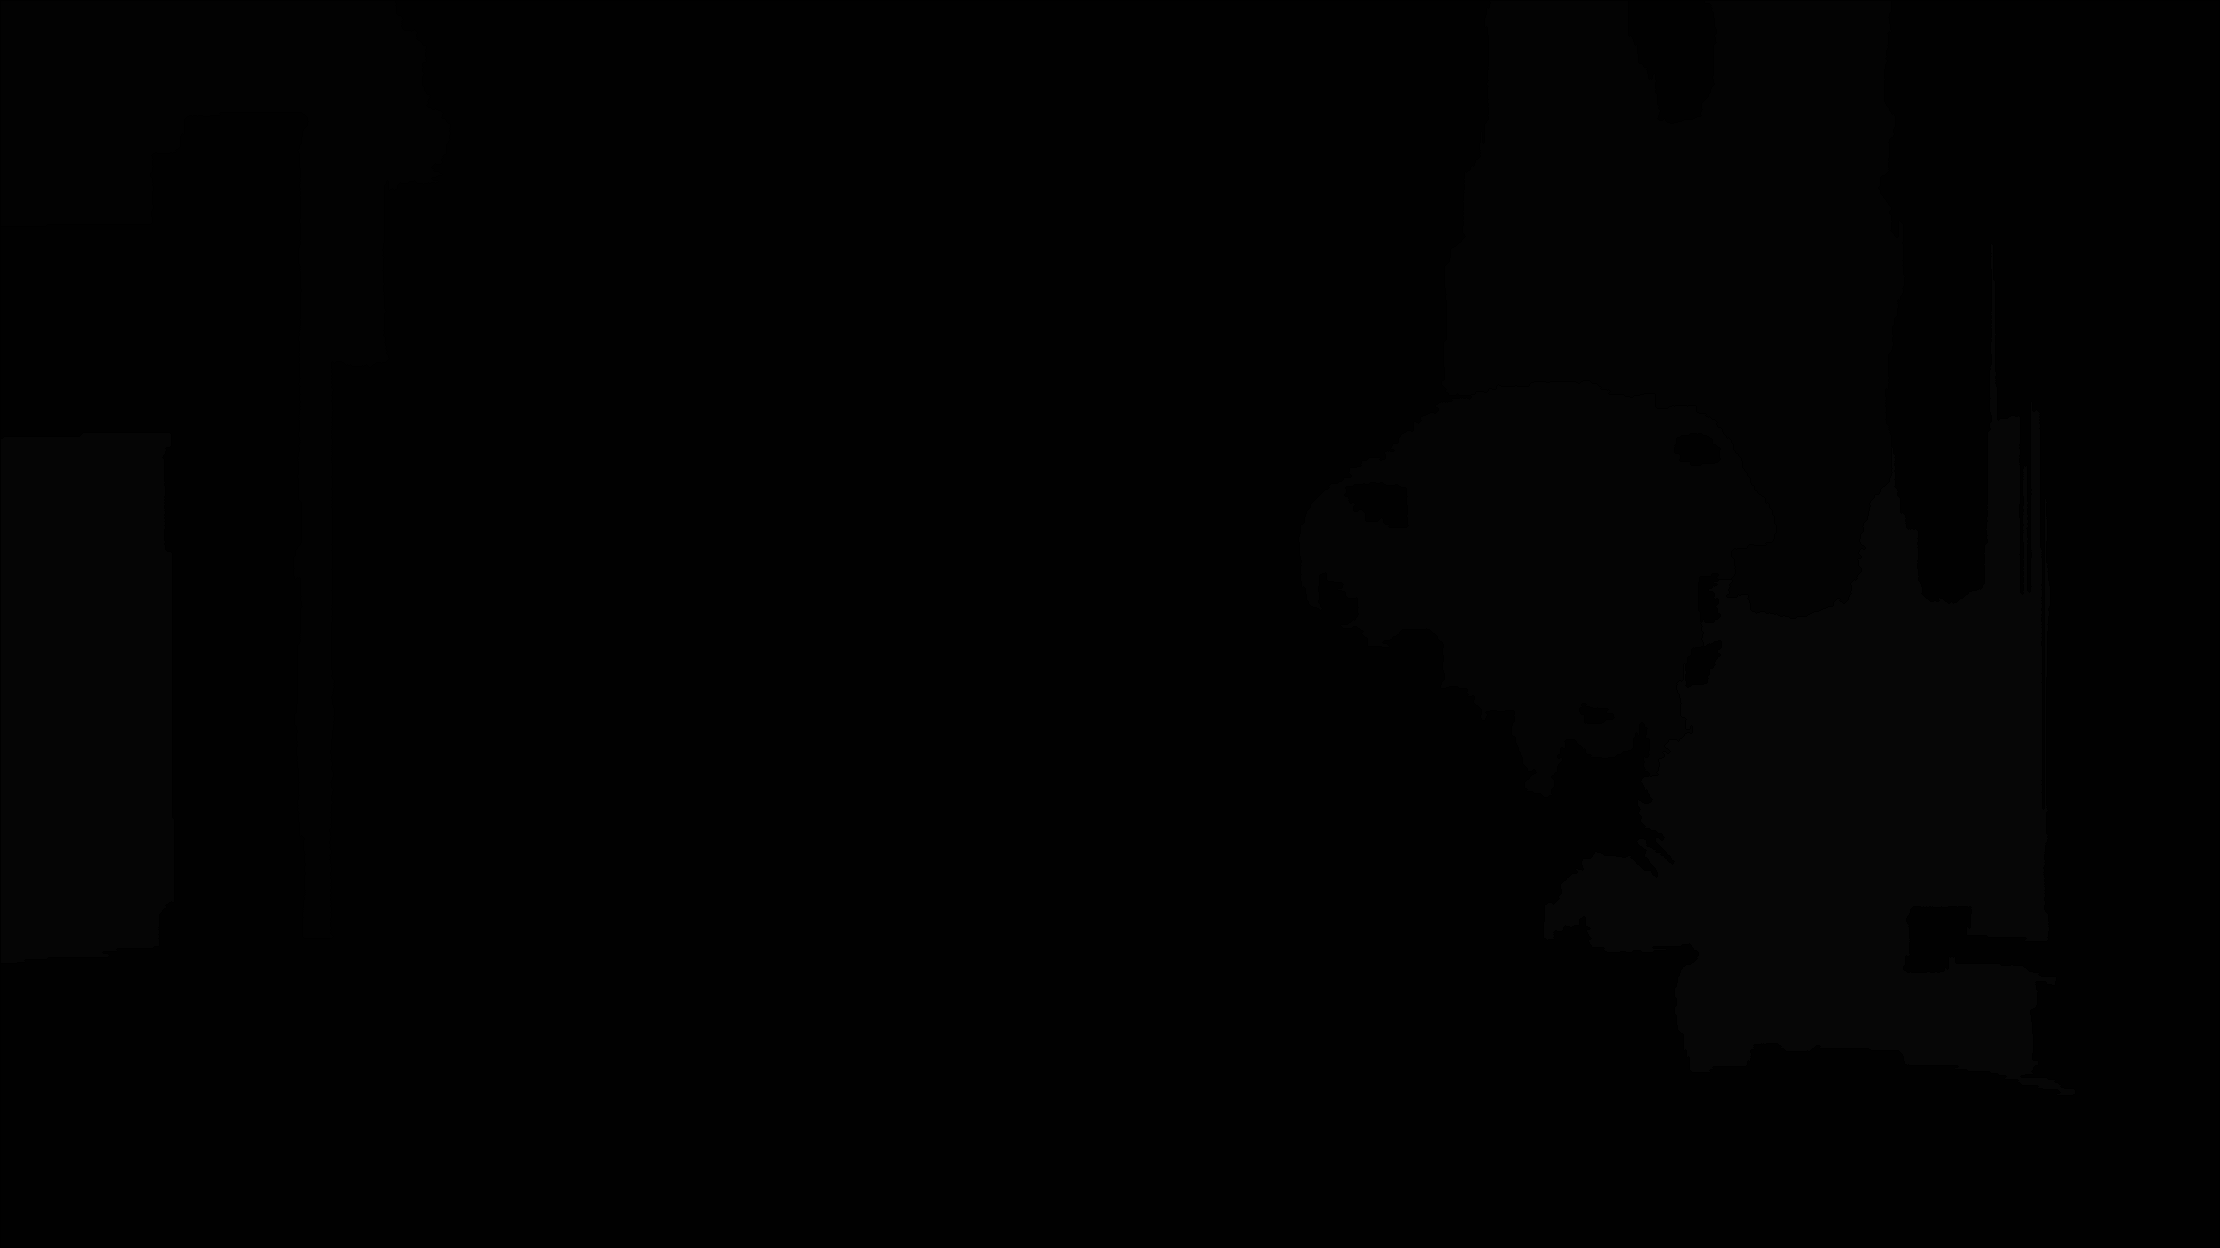

In [ ]:
markers = cv2.watershed(img0,markers)
img0[markers == -1] = [255,0,0]

cv2_imshow(markers)